<a href="https://colab.research.google.com/github/tul17ii/PCA-Random-Forest-on-Gene-Expression/blob/main/PCA_%2B_Random_Forest_on_Gene_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

In [ ]:
# import pandas and numpy
import pandas as pd
import numpy as np

# PCA
from sklearn.decomposition import PCA

# import standard classification tools from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import itertools

# classification model / utilities
from sklearn.model_selection import train_test_split

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

template = 'ggplot2'


In [ ]:
# load data
data = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_52samples_ExprData_T1.txt', sep='\t', header=0)
features = data.iloc[1:, 0].values

# add the gene id to index column
data.index = data.id

# drop or remove 'id' column from the data
data = data.drop(['id'], axis=1)

# transpose
dataT = np.transpose(data)

# prepare train and test data
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

# save class names
classes = np.unique(y)
n_classes = len(classes)
cat = dataT['class']

# prepare train and test data (try changing test_size, enable/disable stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0, stratify=y
)

# print out test class proportion from total
for i in range(len(classes)):
    print(classes[i], y_test.tolist().count(classes[i]), '/', y.tolist().count(classes[i]))


Basal 6 / 14
Claudin-low 2 / 6
Luminal 11 / 27
Normal-like 2 / 5


In [ ]:
dataT = dataT.drop(columns=['class'])
dataT.head()


id,ENSG00000000419,ENSG00000001036,ENSG00000001084,ENSG00000001497,ENSG00000001617,ENSG00000001630,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000269871,ENSG00000269893,ENSG00000269897,ENSG00000269900,ENSG00000269968,ENSG00000270016,ENSG00000270149,ENSG00000270161,ENSG00000270168,ENSG00000270170
184A1,6.06,4.47,4.47,5.27,6.05,6.24,4.17,6.55,5.19,7.12,...,7.34,7.89,5.4,5.28,5.74,0.04,4.39,4.09,2.17,3.99
184B5,5.25,5.39,6,4.27,7.31,5.26,3.51,7.49,4.54,6.53,...,7.53,8.44,5.19,0,5.92,0,4.98,3.9,1.6,4.65
21MT1,5.15,5.28,5.77,6.58,3.99,5.67,3.86,5.69,4.64,6.17,...,7.43,4.7,5.27,5.99,1.91,0,4.78,6.49,2.7,5.92
21NT,5.36,5.82,5.76,5.54,5.93,6.11,5.12,5,4.64,6.76,...,7.61,5.24,5.54,7.25,2.1,0.16,5.07,6.22,3.12,5.89
21PT,5.22,5.75,5.76,5.57,5.98,5.77,4.75,4.9,4.81,6.64,...,7.57,4.8,5.33,7.6,2.66,0,4.81,6.35,3.79,5.97


In [ ]:
# Run Principal Component Analysis
pca = PCA(n_components=3)

pca.fit(dataT)
xpca = pca.transform(dataT)

PC1_label = "PC1 {}%".format(round(100 * pca.explained_variance_ratio_[0], 2))
PC2_label = "PC2 {}%".format(round(100 * pca.explained_variance_ratio_[1], 2))
PC3_label = "PC3 {}%".format(round(100 * pca.explained_variance_ratio_[2], 2))

# create dataframe for PCA
df_pca = pd.DataFrame(xpca)
df_pca.columns = [PC1_label, PC2_label, PC3_label]

# visualize
figPCA = px.scatter_3d(
    df_pca, x=PC1_label, y=PC2_label, z=PC3_label,
    title="PCA 3D plot, colored by Class", color=cat,
    template="plotly_white", height=800, width=800
)
figPCA.show()


/usr/local/lib/python3.12/dist-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [ ]:
!pip -q install --upgrade plotly kaleido


In [ ]:
import pkgutil, plotly, plotly.io as pio
print("plotly:", plotly.__version__)
print("kaleido present?:", pkgutil.find_loader("kaleido") is not None)


plotly: 5.24.1
kaleido present?: True


/tmp/ipython-input-3454557945.py:3: DeprecationWarning:

'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead



In [ ]:
# === One-and-done setup + training cell ===
# (Run this once, then you can run your RF/PCA cells separately.)

# installs (safe to re-run)
!pip -q install scikit-learn pandas numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1) Load dataset
URL = "https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_52samples_ExprData_T1.txt"
data = pd.read_table(URL, sep="\t", header=0)

# 2) Use 'id' as index if present
if 'id' in data.columns:
    data = data.set_index('id')

# 3) Transpose to get samples as rows
dataT = data.T.copy()

# 4) Separate labels ('class') and numeric features
if 'class' in dataT.columns:
    cat = dataT['class'].astype(str).copy()
    feat_df = dataT.drop(columns=['class']).apply(pd.to_numeric, errors='coerce').fillna(0.0)
else:
    raise ValueError("Column 'class' not found in transposed data. Check earlier steps.")

# 5) Build X, y
X = feat_df.to_numpy()
y = cat.to_numpy()

# 6) Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0, stratify=y
)

# 7) Random Forest training & accuracy
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=500,
    verbose=False,
    random_state=0,
    n_jobs=-1
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Model accuracy =", accuracy_score(y_test, predictions))

# (Optional) expose useful vars for later cells:
features = feat_df.columns
classes = np.unique(y)


Model accuracy = 0.8571428571428571


In [ ]:
# define Random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=500, verbose=False, random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Model accuracy = ", accuracy_score(y_test, predictions))


Model accuracy =  0.8571428571428571


In [ ]:
# define Random forest model
model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=5000,
    bootstrap=True,
    verbose=False,
    random_state=0
)

# fit model on training data
model.fit(X_train, y_train)

# Predict test data
predictions = model.predict(X_test)
print("Model accuracy = ", accuracy_score(y_test, predictions))


Model accuracy =  1.0


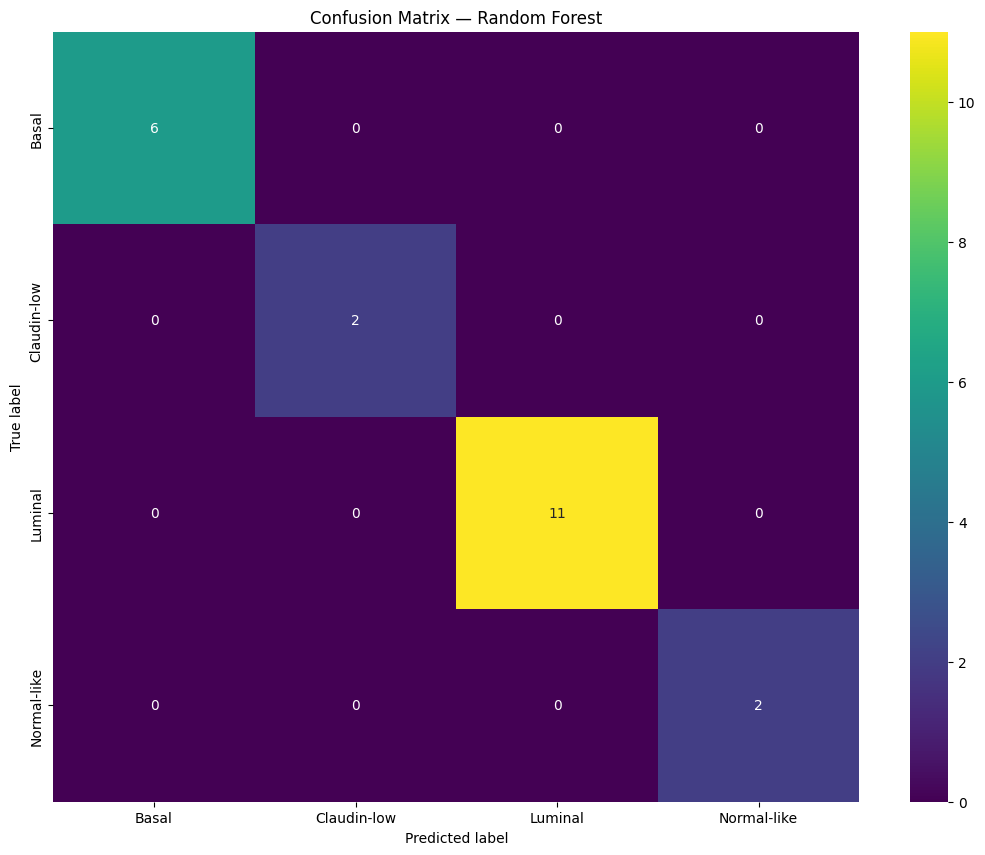

              precision    recall  f1-score   support

       Basal       1.00      1.00      1.00         6
 Claudin-low       1.00      1.00      1.00         2
     Luminal       1.00      1.00      1.00        11
 Normal-like       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [ ]:
# Imports (safe to re-run)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Ensure 'classes' is defined
if 'classes' not in globals():
    classes = np.unique(y)

# Build confusion matrix (fixed label order)
conf = confusion_matrix(y_test, predictions, labels=classes)
new_conf = pd.DataFrame(conf, columns=classes, index=classes)

# Plot heatmap
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(new_conf, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix — Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# (Optional) Detailed metrics
print(classification_report(y_test, predictions, target_names=[str(c) for c in classes]))


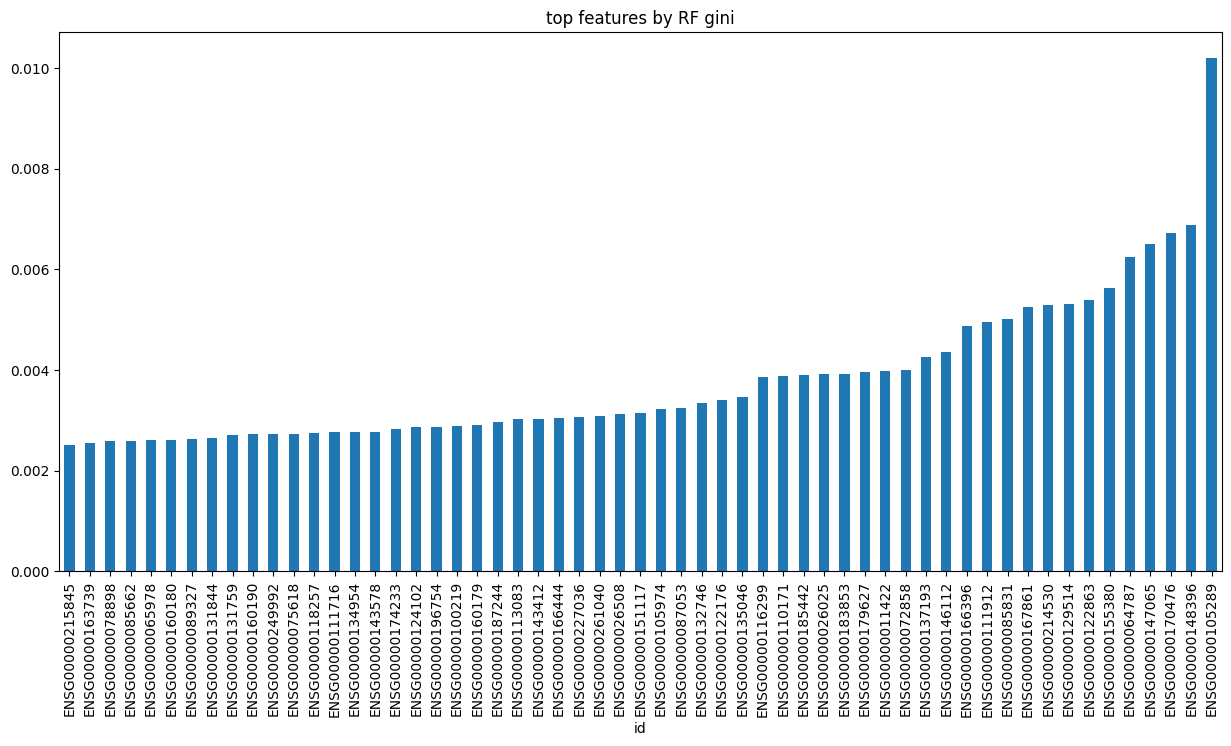

total number of selected features: 57


In [ ]:
# prepare the list of significant features
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

# select top features and save them
forest_importances = pd.Series(importances, index=features)
forest_importances = forest_importances[forest_importances > 0.0025]
forest_importances = forest_importances.sort_values()

# plot forest_importances
ax = forest_importances.plot.bar(figsize=(15, 7), title="top features by RF gini")
plt.show()

print("total number of selected features:", len(forest_importances))


In [ ]:
# 1) Make sure versions match
!pip -q install -U "plotly>=6.3.0" "kaleido>=1.0.0"

# 2) Download a Chrome binary via Kaleido
import kaleido
kaleido.get_chrome_sync()   # <- downloads/locates Chrome for this runtime


PosixPath('/usr/local/lib/python3.12/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome')

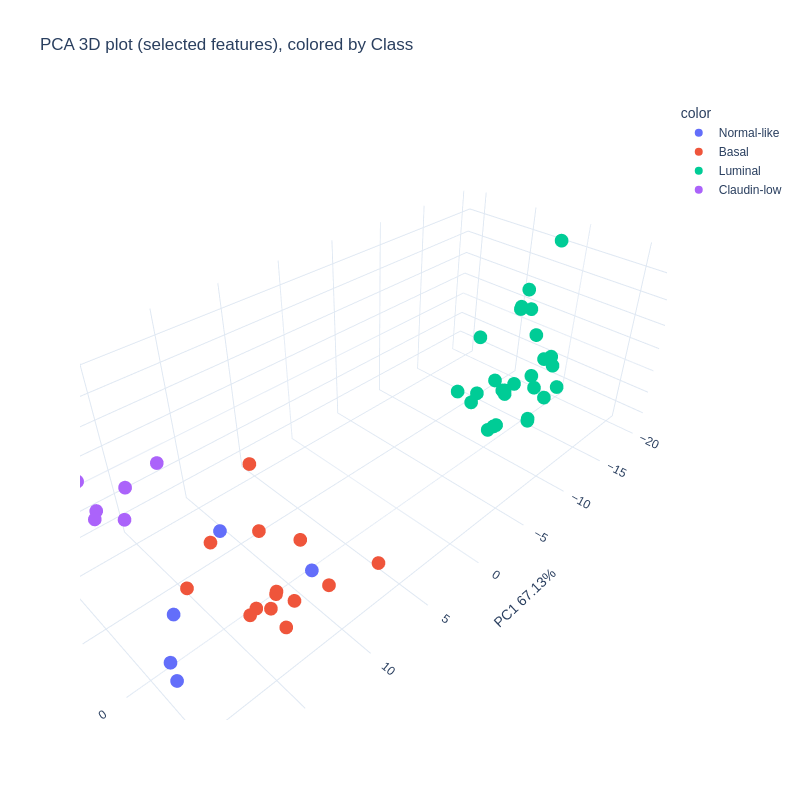

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import Image, display
import plotly.io as pio

# assumes you already created `figPCA`
img_bytes = pio.to_image(figPCA, format="png", width=800, height=800, scale=1)
display(Image(data=img_bytes))

# optional: save & download
with open("/content/pca.png", "wb") as f:
    f.write(img_bytes)

from google.colab import files
files.download("/content/pca.png")


X shape: (52, 6916) | y shape: (52,)
Classes: ['Basal' 'Claudin-low' 'Luminal' 'Normal-like']


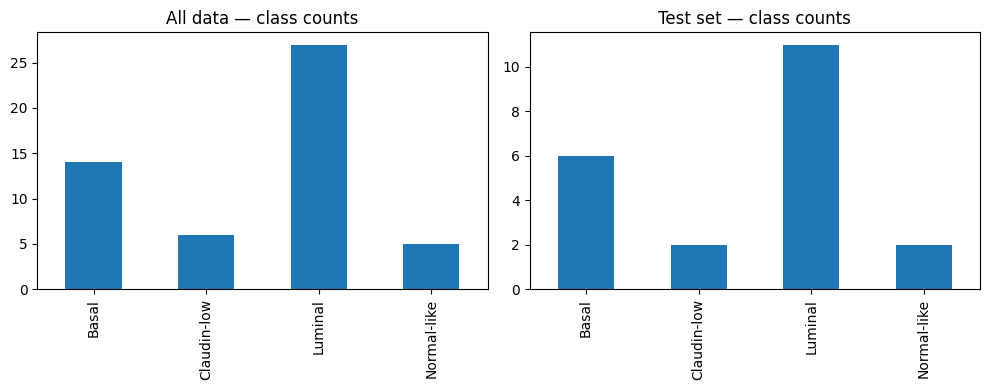

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# sanity checks
print("X shape:", X.shape, "| y shape:", y.shape)
print("Classes:", classes)

# class counts
vc_all = pd.Series(y).value_counts().reindex(classes, fill_value=0)
vc_test = pd.Series(y_test).value_counts().reindex(classes, fill_value=0)

fig, ax = plt.subplots(1,2, figsize=(10,4))
vc_all.plot.bar(ax=ax[0], title="All data — class counts")
vc_test.plot.bar(ax=ax[1], title="Test set — class counts")
plt.tight_layout(); plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

cv_scores = cross_val_score(rf_cv, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
print("CV accuracy: %.3f ± %.3f" % (cv_scores.mean(), cv_scores.std()))


CV accuracy: 0.924 ± 0.094


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    "n_estimators": randint(200, 1200),
    "max_depth": randint(5, 60),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rs = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=40, cv=5, scoring="accuracy",
    verbose=1, random_state=42, n_jobs=-1
)
rs.fit(X_train, y_train)
print("Best CV score:", rs.best_score_)
print("Best params:", rs.best_params_)

# evaluate on holdout
best_model = rs.best_estimator_
from sklearn.metrics import accuracy_score
pred_best = best_model.predict(X_test)
print("Holdout accuracy (best RF):", accuracy_score(y_test, pred_best))


Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Best CV score: 0.8666666666666666
Best params: {'bootstrap': False, 'max_depth': 34, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 659}
Holdout accuracy (best RF): 1.0


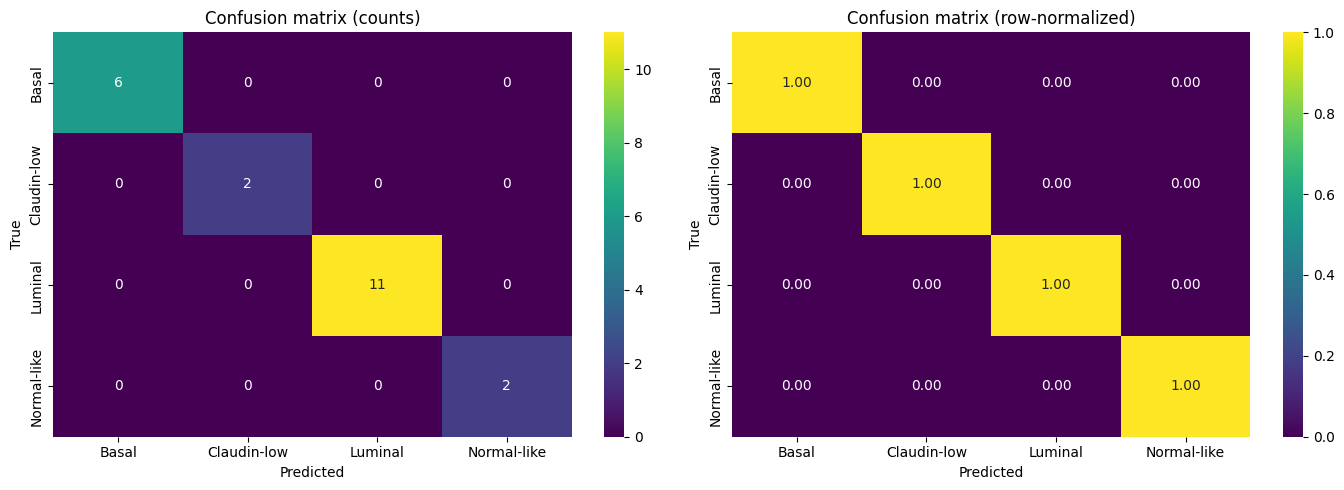

              precision    recall  f1-score   support

       Basal       1.00      1.00      1.00         6
 Claudin-low       1.00      1.00      1.00         2
     Luminal       1.00      1.00      1.00        11
 Normal-like       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np, pandas as pd

pred = best_model.predict(X_test) if 'best_model' in globals() else model.predict(X_test)

cm = confusion_matrix(y_test, pred, labels=classes)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.heatmap(pd.DataFrame(cm, index=classes, columns=classes),
            annot=True, fmt='d', cmap='viridis', ax=ax[0])
ax[0].set_title("Confusion matrix (counts)"); ax[0].set_xlabel("Predicted"); ax[0].set_ylabel("True")

sns.heatmap(pd.DataFrame(cm_norm, index=classes, columns=classes),
            annot=True, fmt='.2f', cmap='viridis', ax=ax[1])
ax[1].set_title("Confusion matrix (row-normalized)"); ax[1].set_xlabel("Predicted"); ax[1].set_ylabel("True")
plt.tight_layout(); plt.show()

print(classification_report(y_test, pred, target_names=[str(c) for c in classes]))


ROC AUC macro: 0.993 | micro: 0.997


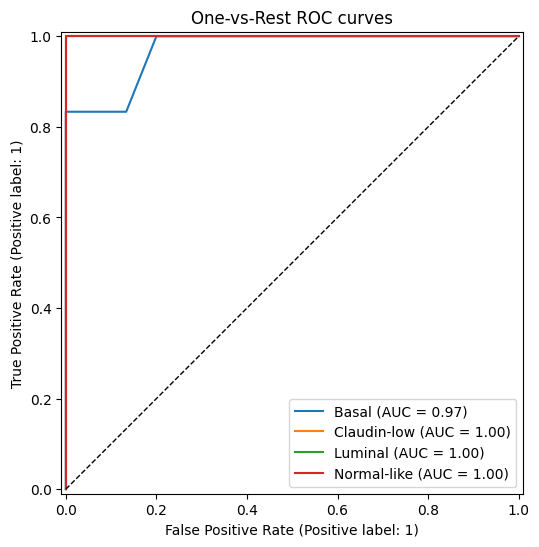

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# binarize labels
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# scale + RF (probabilities needed)
clf_ovr = OneVsRestClassifier(
    make_pipeline(StandardScaler(with_mean=False),  # with_mean=False for sparse safety; OK for dense too
                  RandomForestClassifier(n_estimators=600, random_state=42, n_jobs=-1))
)
clf_ovr.fit(X_train, label_binarize(y_train, classes=classes))
y_score = clf_ovr.predict_proba(X_test)

# AUCs
auc_macro = roc_auc_score(label_binarize(y_test, classes=classes), y_score, average="macro", multi_class="ovr")
auc_micro = roc_auc_score(label_binarize(y_test, classes=classes), y_score, average="micro", multi_class="ovr")
print(f"ROC AUC macro: {auc_macro:.3f} | micro: {auc_micro:.3f}")

# plot per-class ROC
fig, ax = plt.subplots(figsize=(7,6))
for i, c in enumerate(classes):
    RocCurveDisplay.from_predictions(
        (label_binarize(y_test, classes=classes))[:, i],
        y_score[:, i], name=str(c), ax=ax
    )
plt.plot([0,1],[0,1],'k--', lw=1)
plt.title("One-vs-Rest ROC curves"); plt.show()
